In [338]:
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [339]:
import numpy as np
import pandas as pd
import datetime as dt

## Reflect Tables into SQLALchemy ORM

In [340]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [341]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [342]:
# reflect an existing database into a new model
Base=automap_base()

# reflect the tables
Base.prepare(engine,reflect=True)

In [343]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [344]:
# Save references to each table
measurement=Base.classes.measurement
station=Base.classes.station

In [345]:
# Create our session (link) from Python to the DB
session=Session(engine)

## Bonus Challenge Assignment: Temperature Analysis II

In [346]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, maximum, and average temperatures for that range of dates
#def calc_temps(start_date, end_date):
#    """TMIN, TAVG, and TMAX for a list of dates.
    
#    Args:
#        start_date (string): A date string in the format %Y-%m-%d
#        end_date (string): A date string in the format %Y-%m-%d
        
#    Returns:
#        TMIN, TAVE, and TMAX
#    """
    
#    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
#        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# For example
#print(calc_temps('2012-02-28', '2012-03-05'))

In [347]:
# Use the function `calc_temps` to calculate the tmin, tavg, and tmax 
# for a year in the data set
def calc_temps(start_date,end_date):
    session=Session(engine)
    return session.query(func.min(measurement.tobs),func.avg(measurement.tobs),func.max(measurement.tobs)).filter(measurement.date>=start_date).filter(measurement.date<=end_date).all()
calc_temps("2016-08-01","2017-08-01")

[(58.0, 74.64288840262581, 87.0)]

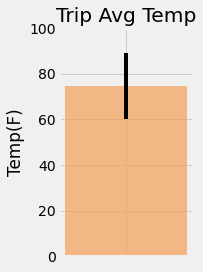

In [348]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for bar height (y value)
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
tmin=calc_temps("2016-08-01","2017-08-01")[0][0]
tavg=calc_temps("2016-08-01","2017-08-01")[0][1]
tmax=calc_temps("2016-08-01","2017-08-01")[0][2]
plt.figure(figsize=(3,4))
bar_category=[""]
plt.bar(bar_category,height=tavg,yerr=(tmax-tmin)*0.5,color="sandybrown",alpha=0.75)
tick_locations=range(0,120,20)
temperature=["0","20","40","60","80","100"]
plt.yticks(tick_locations,temperature)
plt.ylabel("Temp(F)")
plt.title("Trip Avg Temp")
plt.tight_layout()

### Daily Rainfall Average

In [349]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's 
# matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation


session.query(measurement.station,station.name,station.latitude,station.longitude,station.elevation,func.sum(measurement.prcp)).filter(measurement.date>="2016-08-01").filter(measurement.date<="2017-08-01").filter(measurement.station==station.station).group_by(measurement.station).order_by(func.sum(measurement.prcp).desc()).all()

[('USC00516128',
  'MANOA LYON ARBO 785.2, HI US',
  21.3331,
  -157.8025,
  152.4,
  157.91000000000005),
 ('USC00519281',
  'WAIHEE 837.5, HI US',
  21.45167,
  -157.84888999999998,
  32.9,
  79.49000000000005),
 ('USC00513117',
  'KANEOHE 838.1, HI US',
  21.4234,
  -157.8015,
  14.6,
  54.39000000000004),
 ('USC00519523',
  'WAIMANALO EXPERIMENTAL FARM, HI US',
  21.33556,
  -157.71139,
  19.5,
  39.800000000000004),
 ('USC00514830',
  'KUALOA RANCH HEADQUARTERS 886.9, HI US',
  21.5213,
  -157.8374,
  7.0,
  34.25999999999999),
 ('USC00519397',
  'WAIKIKI 717.2, HI US',
  21.2716,
  -157.8168,
  3.0,
  17.199999999999992),
 ('USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9, 4.77)]

In [356]:
# Use this function to calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

#def daily_normals(date):
#    """Daily Normals.
    
#    Args:
#        date (str): A date string in the format '%m-%d'
        
#    Returns:
#        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
#    """
    
#    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
#    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()

# For example
#daily_normals("01-01")
def daily_normals(date):
    sel=[func.min(measurement.tobs),func.avg(measurement.tobs),func.max(measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d",measurement.date)==date).all()
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [352]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip
start_date = '2017-08-01'
end_date = '2017-08-07'

# Use the start and end date to create a range of dates
dates=pd.date_range(start_date,end_date)

# Strip off the year and save a list of strings in the format %m-%d
md=dates.strftime("%m-%d")  

# Use the `daily_normals` function to calculate the normals for each date string 
# and append the results to a list called `normals`.
normals=[]
for item in md:

    normals.append(daily_normals(item))

normals

[[(67.0, 75.54, 83.0)],
 [(68.0, 75.60377358490567, 84.0)],
 [(70.0, 76.61111111111111, 85.0)],
 [(69.0, 76.71153846153847, 84.0)],
 [(69.0, 76.14814814814815, 82.0)],
 [(67.0, 76.25, 83.0)],
 [(71.0, 77.15686274509804, 83.0)]]

In [353]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index
df=pd.DataFrame(normals)
df.columns=["temp"]
df["trip_dates"]=dates
df.set_index("trip_dates",inplace=True)
#split temp column to 3 columns
df["tmin"],df["tavg"],df["tmax"]=df["temp"].str
#round dataframe to 2 digits after decimal point
df=round(df,2)
display(df)


,temp,tmin,tavg,tmax
trip_dates,,,,
2017-08-01,"(67.0, 75.54, 83.0)",67.0,75.54,83.0
2017-08-02,"(68.0, 75.60377358490567, 84.0)",68.0,75.60,84.0
2017-08-03,"(70.0, 76.61111111111111, 85.0)",70.0,76.61,85.0
2017-08-04,"(69.0, 76.71153846153847, 84.0)",69.0,76.71,84.0
2017-08-05,"(69.0, 76.14814814814815, 82.0)",69.0,76.15,82.0
2017-08-06,"(67.0, 76.25, 83.0)",67.0,76.25,83.0
2017-08-07,"(71.0, 77.15686274509804, 83.0)",71.0,77.16,83.0


In [354]:
# Plot the daily normals as an area plot with `stacked=False`
#delete temp column
del df["temp"]
#create new dataframe and delete index column
df2=pd.DataFrame(df)
df2.reset_index(drop=True,inplace=True)
display(df2)


,tmin,tavg,tmax
0,67.0,75.54,83.0
1,68.0,75.60,84.0
2,70.0,76.61,85.0
3,69.0,76.71,84.0
4,69.0,76.15,82.0
5,67.0,76.25,83.0
6,71.0,77.16,83.0


Text(0.5, 0, 'Date')

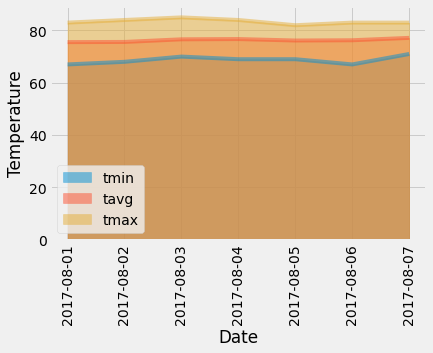

In [355]:
#area plot daily normals
df2.plot(kind="area",stacked=False)
labels=("2017-08-01","2017-08-02","2017-08-03","2017-08-04","2017-08-05","2017-08-06","2017-08-07")

plt.xticks(np.arange(0,7,1),labels,rotation=90)
plt.ylabel("Temperature")
plt.xlabel("Date")


## Close Session

In [ ]:
session.close()